In [1]:
from glob import glob
import json
import os
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import re


In [2]:
# load all en ja zh json file paths
en_text_map_path = 'GAMEDATA/GenshinData/TextMap/TextMapEN.json'
ja_text_map_path = 'GAMEDATA/GenshinData/TextMap/TextMapJP.json'
zh_text_map_path = 'GAMEDATA/GenshinData/TextMap/TextMapCHS.json'

# read json file and append to df
# json format: {index: text}
with open(en_text_map_path, 'r', encoding='utf-8') as f:
    en_text_map = pd.DataFrame(json.load(f).items(), columns=['index', 'en'])
with open(ja_text_map_path, 'r', encoding='utf-8') as f:
    ja_text_map = pd.DataFrame(json.load(f).items(), columns=['index', 'ja'])
with open(zh_text_map_path, 'r', encoding='utf-8') as f:
    zh_text_map = pd.DataFrame(json.load(f).items(), columns=['index', 'zh'])

# merge all df
df = pd.merge(en_text_map, ja_text_map, on='index', how='outer')
df = pd.merge(df, zh_text_map, on='index', how='outer')
df

,index,en,ja,zh
0,1016061400,Googol Chair,グーゴル·イス,古高尔椅子
1,1030047192,A masquerade mask worn by the old aristocrats ...,モンドの旧貴族が舞踏会に使用していた仮面、空洞となった目の縁は今でも昔の光景を見つめている。,曾经属于旧日蒙德贵族的舞会面具，那空洞的眼眶依旧凝望着昔日的盛景。
2,1032808920,Sweet-Flower Medaka,スイートグッピー,甜甜花鳉
3,1035217368,Unlock Hangout Event,デートイベント開放,解锁邀约事件
4,1046135256,Paimon,パイモン,派蒙
...,...,...,...,...
370698,4054733106,NaN,NaN,（test）准备好了，那现在就过去吧。
370699,909274418,NaN,NaN,我家周围这些蔬果什么的，临走就摘些吧。反正我年纪大了，也吃不完。$UNRELEASED
370700,1694647939,NaN,NaN,(test) 起点UI
370701,834192003,NaN,NaN,(test)观察木板


In [3]:
# drop duplicate
df = df.drop_duplicates(subset=['en', 'ja', 'zh'], keep='first')
# remove empty lines and nan
df = df[df['en'] != '']
df = df[df['ja'] != '']
df = df[df['zh'] != '']
df = df.dropna()
# drop index column
df = df.drop(columns=['index'])
df

,en,ja,zh
0,Googol Chair,グーゴル·イス,古高尔椅子
1,A masquerade mask worn by the old aristocrats ...,モンドの旧貴族が舞踏会に使用していた仮面、空洞となった目の縁は今でも昔の光景を見つめている。,曾经属于旧日蒙德贵族的舞会面具，那空洞的眼眶依旧凝望着昔日的盛景。
2,Sweet-Flower Medaka,スイートグッピー,甜甜花鳉
3,Unlock Hangout Event,デートイベント開放,解锁邀约事件
4,Paimon,パイモン,派蒙
...,...,...,...
358969,This was once used in adepti arts to lower the...,仙人儀式で周りの温度を下げるために置いていたが、まだここに残されていたとは…,当初在仙家仪式中用于降低周围环境的温度，居然现在还没被摘走…
358972,"Inspiration Collection Progress for ""Parting"":...",「別離」アイデア素材の収集進捗：{0},「别离」灵感素材收集进度：{0}
358973,What could he be up to? Let's investigate!,アイツが一体なにしてたか気になるな。この辺りに手がかりがないか探そう。,那个人究竟在做什么？我们在周围调查一下，找找线索吧。
358976,The Ministry of Civil Affairs has specifically...,璃月総務司から層岩巨淵に派遣された特別な行政人員。\n主な仕事は、層岩巨淵が封鎖している間の...,璃月总务司派驻层岩巨渊的特别行政人员。\n主要负责维护层岩巨渊在封锁中的秩序，保障驻留人员的...


In [4]:
# remove html tag
df['en'] = df['en'].apply(lambda x: re.sub(r'<[^>]*?>', '', str(x)))
df['ja'] = df['ja'].apply(lambda x: re.sub(r'<[^>]*?>', '', str(x)))
df['zh'] = df['zh'].apply(lambda x: re.sub(r'<[^>]*?>', '', str(x)))
df

,en,ja,zh
0,Googol Chair,グーゴル·イス,古高尔椅子
1,A masquerade mask worn by the old aristocrats ...,モンドの旧貴族が舞踏会に使用していた仮面、空洞となった目の縁は今でも昔の光景を見つめている。,曾经属于旧日蒙德贵族的舞会面具，那空洞的眼眶依旧凝望着昔日的盛景。
2,Sweet-Flower Medaka,スイートグッピー,甜甜花鳉
3,Unlock Hangout Event,デートイベント開放,解锁邀约事件
4,Paimon,パイモン,派蒙
...,...,...,...
358969,This was once used in adepti arts to lower the...,仙人儀式で周りの温度を下げるために置いていたが、まだここに残されていたとは…,当初在仙家仪式中用于降低周围环境的温度，居然现在还没被摘走…
358972,"Inspiration Collection Progress for ""Parting"":...",「別離」アイデア素材の収集進捗：{0},「别离」灵感素材收集进度：{0}
358973,What could he be up to? Let's investigate!,アイツが一体なにしてたか気になるな。この辺りに手がかりがないか探そう。,那个人究竟在做什么？我们在周围调查一下，找找线索吧。
358976,The Ministry of Civil Affairs has specifically...,璃月総務司から層岩巨淵に派遣された特別な行政人員。\n主な仕事は、層岩巨淵が封鎖している間の...,璃月总务司派驻层岩巨渊的特别行政人员。\n主要负责维护层岩巨渊在封锁中的秩序，保障驻留人员的...


In [5]:
# split text by \n
# check if number \n is the same for all languages
# if not, just keep it not split
drop_count = 0
for i, row in tqdm(enumerate(df.itertuples()), total=df.shape[0]):
    en, ja, zh = row.en, row.ja, row.zh
    if not r'\n' in en or not r'\n' in ja or not r'\n' in zh:
        continue
    en_split = en.split(r'\n')
    ja_split = ja.split(r'\n')
    zh_split = zh.split(r'\n')
    if len(en_split) == len(ja_split) == len(zh_split):
        # append to df
        df = pd.concat([df, pd.DataFrame({'en': en_split, 'ja': ja_split, 'zh': zh_split})], ignore_index=True)
        # drop
        df = df.drop(index=i)
        drop_count += 1

print(f'drop {drop_count} rows')
df

/tmp/ipykernel_5838/3780974281.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, row in tqdm(enumerate(df.itertuples()), total=df.shape[0]):


  0%|          | 0/245927 [00:00<?, ?it/s]

drop 6861 rows


,en,ja,zh
0,Googol Chair,グーゴル·イス,古高尔椅子
1,A masquerade mask worn by the old aristocrats ...,モンドの旧貴族が舞踏会に使用していた仮面、空洞となった目の縁は今でも昔の光景を見つめている。,曾经属于旧日蒙德贵族的舞会面具，那空洞的眼眶依旧凝望着昔日的盛景。
2,Sweet-Flower Medaka,スイートグッピー,甜甜花鳉
3,Unlock Hangout Event,デートイベント開放,解锁邀约事件
4,Paimon,パイモン,派蒙
...,...,...,...
264012,{0} {1} required. Continue?,{1}を{0}個消費して、活性化しますか？,激活将消耗{0}个{1}，是否确认激活？
264013,Corrosion Resistance increased to {0}.,侵食耐性が{0}にアップ。,抗侵蚀强度提升至{0}。
264014,The Bokuso Box is now able to disperse the gre...,睦疎の箱は最も強力な黒霧を消散することができるようになる。,睦疏之匣可驱散最强大的黑雾。
264015,The Ministry of Civil Affairs has specifically...,璃月総務司から層岩巨淵に派遣された特別な行政人員。,璃月总务司派驻层岩巨渊的特别行政人员。


In [6]:
# remove \n
df['en'] = df['en'].apply(lambda x: re.sub(r'\\n', '', str(x)))
df['ja'] = df['ja'].apply(lambda x: re.sub(r'\\n', '', str(x)))
df['zh'] = df['zh'].apply(lambda x: re.sub(r'\\n', '', str(x)))
df

,en,ja,zh
0,Googol Chair,グーゴル·イス,古高尔椅子
1,A masquerade mask worn by the old aristocrats ...,モンドの旧貴族が舞踏会に使用していた仮面、空洞となった目の縁は今でも昔の光景を見つめている。,曾经属于旧日蒙德贵族的舞会面具，那空洞的眼眶依旧凝望着昔日的盛景。
2,Sweet-Flower Medaka,スイートグッピー,甜甜花鳉
3,Unlock Hangout Event,デートイベント開放,解锁邀约事件
4,Paimon,パイモン,派蒙
...,...,...,...
264012,{0} {1} required. Continue?,{1}を{0}個消費して、活性化しますか？,激活将消耗{0}个{1}，是否确认激活？
264013,Corrosion Resistance increased to {0}.,侵食耐性が{0}にアップ。,抗侵蚀强度提升至{0}。
264014,The Bokuso Box is now able to disperse the gre...,睦疎の箱は最も強力な黒霧を消散することができるようになる。,睦疏之匣可驱散最强大的黑雾。
264015,The Ministry of Civil Affairs has specifically...,璃月総務司から層岩巨淵に派遣された特別な行政人員。,璃月总务司派驻层岩巨渊的特别行政人员。


In [7]:
# remove row with only punctuation
df = df[~df['en'].str.match(r'^[^\w\s]+$')]
df = df[~df['ja'].str.match(r'^[^\w\s]+$')]
df = df[~df['zh'].str.match(r'^[^\w\s]+$')]
df

,en,ja,zh
0,Googol Chair,グーゴル·イス,古高尔椅子
1,A masquerade mask worn by the old aristocrats ...,モンドの旧貴族が舞踏会に使用していた仮面、空洞となった目の縁は今でも昔の光景を見つめている。,曾经属于旧日蒙德贵族的舞会面具，那空洞的眼眶依旧凝望着昔日的盛景。
2,Sweet-Flower Medaka,スイートグッピー,甜甜花鳉
3,Unlock Hangout Event,デートイベント開放,解锁邀约事件
4,Paimon,パイモン,派蒙
...,...,...,...
264012,{0} {1} required. Continue?,{1}を{0}個消費して、活性化しますか？,激活将消耗{0}个{1}，是否确认激活？
264013,Corrosion Resistance increased to {0}.,侵食耐性が{0}にアップ。,抗侵蚀强度提升至{0}。
264014,The Bokuso Box is now able to disperse the gre...,睦疎の箱は最も強力な黒霧を消散することができるようになる。,睦疏之匣可驱散最强大的黑雾。
264015,The Ministry of Civil Affairs has specifically...,璃月総務司から層岩巨淵に派遣された特別な行政人員。,璃月总务司派驻层岩巨渊的特别行政人员。


In [8]:
# remove lines with only numbers
df = df[~df['en'].str.match(r'^\d+$')]
df = df[~df['ja'].str.match(r'^\d+$')]
df = df[~df['zh'].str.match(r'^\d+$')]
df

,en,ja,zh
0,Googol Chair,グーゴル·イス,古高尔椅子
1,A masquerade mask worn by the old aristocrats ...,モンドの旧貴族が舞踏会に使用していた仮面、空洞となった目の縁は今でも昔の光景を見つめている。,曾经属于旧日蒙德贵族的舞会面具，那空洞的眼眶依旧凝望着昔日的盛景。
2,Sweet-Flower Medaka,スイートグッピー,甜甜花鳉
3,Unlock Hangout Event,デートイベント開放,解锁邀约事件
4,Paimon,パイモン,派蒙
...,...,...,...
264012,{0} {1} required. Continue?,{1}を{0}個消費して、活性化しますか？,激活将消耗{0}个{1}，是否确认激活？
264013,Corrosion Resistance increased to {0}.,侵食耐性が{0}にアップ。,抗侵蚀强度提升至{0}。
264014,The Bokuso Box is now able to disperse the gre...,睦疎の箱は最も強力な黒霧を消散することができるようになる。,睦疏之匣可驱散最强大的黑雾。
264015,The Ministry of Civil Affairs has specifically...,璃月総務司から層岩巨淵に派遣された特別な行政人員。,璃月总务司派驻层岩巨渊的特别行政人员。


In [9]:
# remove lines that tokens is more than 256 or less than 1
from transformers import MT5TokenizerFast
tokenizer = MT5TokenizerFast.from_pretrained('google/mt5-small')

df['en_len'] = df['en'].apply(lambda x: len(tokenizer.tokenize(x)))
df['ja_len'] = df['ja'].apply(lambda x: len(tokenizer.tokenize(x)))
df['zh_len'] = df['zh'].apply(lambda x: len(tokenizer.tokenize(x)))
df

/home/toshihiko/anaconda3/envs/pytorch201/lib/python3.8/site-packages/transformers/convert_slow_tokenizer.py:454: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


,en,ja,zh,en_len,ja_len,zh_len
0,Googol Chair,グーゴル·イス,古高尔椅子,3,6,5
1,A masquerade mask worn by the old aristocrats ...,モンドの旧貴族が舞踏会に使用していた仮面、空洞となった目の縁は今でも昔の光景を見つめている。,曾经属于旧日蒙德贵族的舞会面具，那空洞的眼眶依旧凝望着昔日的盛景。,33,30,30
2,Sweet-Flower Medaka,スイートグッピー,甜甜花鳉,5,5,5
3,Unlock Hangout Event,デートイベント開放,解锁邀约事件,5,4,6
4,Paimon,パイモン,派蒙,2,3,3
...,...,...,...,...,...,...
264012,{0} {1} required. Continue?,{1}を{0}個消費して、活性化しますか？,激活将消耗{0}个{1}，是否确认激活？,9,13,16
264013,Corrosion Resistance increased to {0}.,侵食耐性が{0}にアップ。,抗侵蚀强度提升至{0}。,10,10,10
264014,The Bokuso Box is now able to disperse the gre...,睦疎の箱は最も強力な黒霧を消散することができるようになる。,睦疏之匣可驱散最强大的黑雾。,17,17,13
264015,The Ministry of Civil Affairs has specifically...,璃月総務司から層岩巨淵に派遣された特別な行政人員。,璃月总务司派驻层岩巨渊的特别行政人员。,18,17,17


In [10]:
df = df[df['en_len'] <= 256]
df = df[df['ja_len'] <= 256]
df = df[df['zh_len'] <= 256]
df = df[df['en_len'] >= 1]
df = df[df['ja_len'] >= 1]
df = df[df['zh_len'] >= 1]
df

,en,ja,zh,en_len,ja_len,zh_len
0,Googol Chair,グーゴル·イス,古高尔椅子,3,6,5
1,A masquerade mask worn by the old aristocrats ...,モンドの旧貴族が舞踏会に使用していた仮面、空洞となった目の縁は今でも昔の光景を見つめている。,曾经属于旧日蒙德贵族的舞会面具，那空洞的眼眶依旧凝望着昔日的盛景。,33,30,30
2,Sweet-Flower Medaka,スイートグッピー,甜甜花鳉,5,5,5
3,Unlock Hangout Event,デートイベント開放,解锁邀约事件,5,4,6
4,Paimon,パイモン,派蒙,2,3,3
...,...,...,...,...,...,...
264012,{0} {1} required. Continue?,{1}を{0}個消費して、活性化しますか？,激活将消耗{0}个{1}，是否确认激活？,9,13,16
264013,Corrosion Resistance increased to {0}.,侵食耐性が{0}にアップ。,抗侵蚀强度提升至{0}。,10,10,10
264014,The Bokuso Box is now able to disperse the gre...,睦疎の箱は最も強力な黒霧を消散することができるようになる。,睦疏之匣可驱散最强大的黑雾。,17,17,13
264015,The Ministry of Civil Affairs has specifically...,璃月総務司から層岩巨淵に派遣された特別な行政人員。,璃月总务司派驻层岩巨渊的特别行政人员。,18,17,17


In [11]:
# remove lines that LaBSE score is less than 0.6 or more than 0.99
import numpy as np
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/LaBSE').cuda()


_batch, _scores = [], []
_bs = 64
for i, row in tqdm(enumerate(df.itertuples()), total=df.shape[0]):
    inputs = [row.en, row.ja, row.zh]
    _batch.extend(inputs)
    if (i+1) % _bs == 0 or i == df.shape[0]-1:
        embeddings = model.encode(_batch)
        # calculate score between each pair
        for j in range(embeddings.shape[0]//3):
            _scores.append(np.average([
                np.matmul(embeddings[j*3], embeddings[j*3+1].T),
                np.matmul(embeddings[j*3], embeddings[j*3+2].T),
                np.matmul(embeddings[j*3+1], embeddings[j*3+2].T)
            ]))
        _batch = []
df = df.assign(score=_scores)
df

/tmp/ipykernel_5838/115076287.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, row in tqdm(enumerate(df.itertuples()), total=df.shape[0]):


  0%|          | 0/261848 [00:00<?, ?it/s]

,en,ja,zh,en_len,ja_len,zh_len,score
0,Googol Chair,グーゴル·イス,古高尔椅子,3,6,5,0.658794
1,A masquerade mask worn by the old aristocrats ...,モンドの旧貴族が舞踏会に使用していた仮面、空洞となった目の縁は今でも昔の光景を見つめている。,曾经属于旧日蒙德贵族的舞会面具，那空洞的眼眶依旧凝望着昔日的盛景。,33,30,30,0.699381
2,Sweet-Flower Medaka,スイートグッピー,甜甜花鳉,5,5,5,0.433426
3,Unlock Hangout Event,デートイベント開放,解锁邀约事件,5,4,6,0.713721
4,Paimon,パイモン,派蒙,2,3,3,0.858970
...,...,...,...,...,...,...,...
264012,{0} {1} required. Continue?,{1}を{0}個消費して、活性化しますか？,激活将消耗{0}个{1}，是否确认激活？,9,13,16,0.780608
264013,Corrosion Resistance increased to {0}.,侵食耐性が{0}にアップ。,抗侵蚀强度提升至{0}。,10,10,10,0.906608
264014,The Bokuso Box is now able to disperse the gre...,睦疎の箱は最も強力な黒霧を消散することができるようになる。,睦疏之匣可驱散最强大的黑雾。,17,17,13,0.730138
264015,The Ministry of Civil Affairs has specifically...,璃月総務司から層岩巨淵に派遣された特別な行政人員。,璃月总务司派驻层岩巨渊的特别行政人员。,18,17,17,0.549008


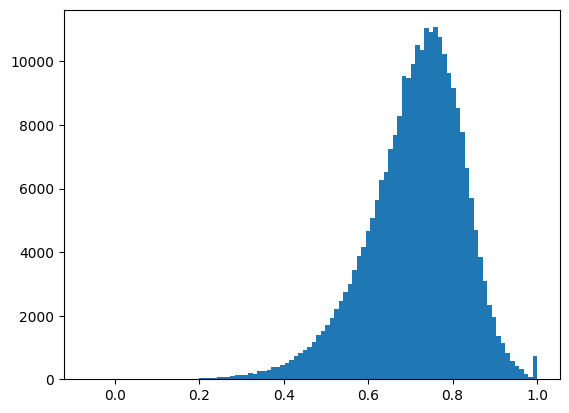

In [12]:
# statistics score using matplotlib
import matplotlib.pyplot as plt
plt.hist(df['score'], bins=100)
plt.show()

In [13]:
# remove lines that LaBSE score is less than 0.6 or more than 0.99
df = df[df['score'] >= 0.6]
df = df[df['score'] <= 0.99]
df

,en,ja,zh,en_len,ja_len,zh_len,score
0,Googol Chair,グーゴル·イス,古高尔椅子,3,6,5,0.658794
1,A masquerade mask worn by the old aristocrats ...,モンドの旧貴族が舞踏会に使用していた仮面、空洞となった目の縁は今でも昔の光景を見つめている。,曾经属于旧日蒙德贵族的舞会面具，那空洞的眼眶依旧凝望着昔日的盛景。,33,30,30,0.699381
3,Unlock Hangout Event,デートイベント開放,解锁邀约事件,5,4,6,0.713721
4,Paimon,パイモン,派蒙,2,3,3,0.858970
6,Barbara is the Deaconess of the Church of Favo...,バーバラは西風教会の祈祷牧師であり、モンドのアイドルでもある。「バーバラに会うと、気分が良く...,芭芭拉是西风教会的祈礼牧师，同时也是蒙德城的闪耀偶像。「只要看到芭芭拉，心情就能变好。」——...,135,91,104,0.796881
...,...,...,...,...,...,...,...
264008,The Cage-Maker,「籠作り」,「造笼师」,5,4,5,0.661044
264012,{0} {1} required. Continue?,{1}を{0}個消費して、活性化しますか？,激活将消耗{0}个{1}，是否确认激活？,9,13,16,0.780608
264013,Corrosion Resistance increased to {0}.,侵食耐性が{0}にアップ。,抗侵蚀强度提升至{0}。,10,10,10,0.906608
264014,The Bokuso Box is now able to disperse the gre...,睦疎の箱は最も強力な黒霧を消散することができるようになる。,睦疏之匣可驱散最强大的黑雾。,17,17,13,0.730138


In [14]:
# replace「」to “”, 『』to ‘’ in zh
df['zh'] = df['zh'].apply(lambda x: x.replace('「', '“'))
df['zh'] = df['zh'].apply(lambda x: x.replace('」', '”'))
df['zh'] = df['zh'].apply(lambda x: x.replace('『', '‘'))
df['zh'] = df['zh'].apply(lambda x: x.replace('』', '’'))
df

,en,ja,zh,en_len,ja_len,zh_len,score
0,Googol Chair,グーゴル·イス,古高尔椅子,3,6,5,0.658794
1,A masquerade mask worn by the old aristocrats ...,モンドの旧貴族が舞踏会に使用していた仮面、空洞となった目の縁は今でも昔の光景を見つめている。,曾经属于旧日蒙德贵族的舞会面具，那空洞的眼眶依旧凝望着昔日的盛景。,33,30,30,0.699381
3,Unlock Hangout Event,デートイベント開放,解锁邀约事件,5,4,6,0.713721
4,Paimon,パイモン,派蒙,2,3,3,0.858970
6,Barbara is the Deaconess of the Church of Favo...,バーバラは西風教会の祈祷牧師であり、モンドのアイドルでもある。「バーバラに会うと、気分が良く...,芭芭拉是西风教会的祈礼牧师，同时也是蒙德城的闪耀偶像。“只要看到芭芭拉，心情就能变好。”——...,135,91,104,0.796881
...,...,...,...,...,...,...,...
264008,The Cage-Maker,「籠作り」,“造笼师”,5,4,5,0.661044
264012,{0} {1} required. Continue?,{1}を{0}個消費して、活性化しますか？,激活将消耗{0}个{1}，是否确认激活？,9,13,16,0.780608
264013,Corrosion Resistance increased to {0}.,侵食耐性が{0}にアップ。,抗侵蚀强度提升至{0}。,10,10,10,0.906608
264014,The Bokuso Box is now able to disperse the gre...,睦疎の箱は最も強力な黒霧を消散することができるようになる。,睦疏之匣可驱散最强大的黑雾。,17,17,13,0.730138


In [15]:
# drop len and score column
df = df.drop(columns=['en_len', 'ja_len', 'zh_len', 'score'])
# save to parquet
df.to_parquet('parquet/GenshinTextMap.parquet', index=False)

In [16]:
# load parquet
df = pd.read_parquet('parquet/GenshinTextMap.parquet')
df

,en,ja,zh
0,Googol Chair,グーゴル·イス,古高尔椅子
1,A masquerade mask worn by the old aristocrats ...,モンドの旧貴族が舞踏会に使用していた仮面、空洞となった目の縁は今でも昔の光景を見つめている。,曾经属于旧日蒙德贵族的舞会面具，那空洞的眼眶依旧凝望着昔日的盛景。
2,Unlock Hangout Event,デートイベント開放,解锁邀约事件
3,Paimon,パイモン,派蒙
4,Barbara is the Deaconess of the Church of Favo...,バーバラは西風教会の祈祷牧師であり、モンドのアイドルでもある。「バーバラに会うと、気分が良く...,芭芭拉是西风教会的祈礼牧师，同时也是蒙德城的闪耀偶像。“只要看到芭芭拉，心情就能变好。”——...
...,...,...,...
221102,The Cage-Maker,「籠作り」,“造笼师”
221103,{0} {1} required. Continue?,{1}を{0}個消費して、活性化しますか？,激活将消耗{0}个{1}，是否确认激活？
221104,Corrosion Resistance increased to {0}.,侵食耐性が{0}にアップ。,抗侵蚀强度提升至{0}。
221105,The Bokuso Box is now able to disperse the gre...,睦疎の箱は最も強力な黒霧を消散することができるようになる。,睦疏之匣可驱散最强大的黑雾。
